# The hope of this code is to be able to do fundemental physics with simple force plate data


## Fundemental Physics:


    - Momentum Principle
    
    
## Things to include:
    - graphs +
    - integration for a single jump +
    - some animation of the forces
    - "Normalizization" +
    
    
    - long jump, broad jump +
    


In [1]:
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas as pd

## Read in data file and make data frame

In [2]:
filename='DoubleLegJump.txt'
amtidata = loadtxt(filename, dtype = float, delimiter = ',', skiprows = 0)
#df = pd.DataFrame(datafile)

In [3]:
headings = ['Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz']



df = pd.DataFrame(amtidata, columns = headings)

## Graph to see what the data looks like

<Figure size 432x288 with 0 Axes>

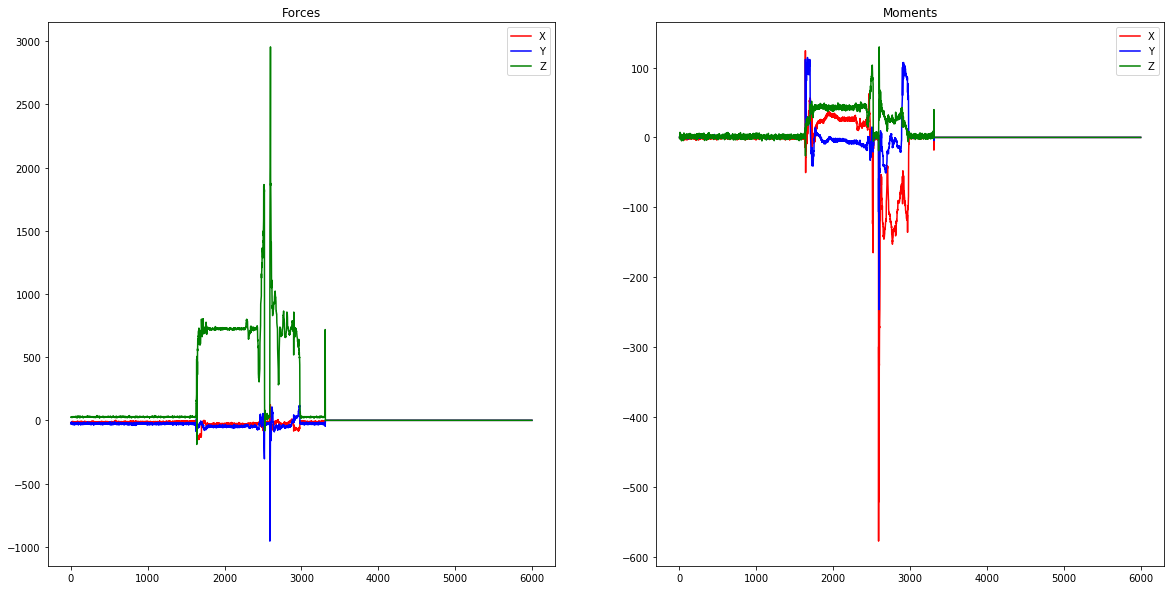

In [4]:
plt.figure()
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(df['Fx'], 'r', label = 'X')
plt.plot(df['Fy'], 'b', label = 'Y')
plt.plot(df['Fz'], 'g', label = 'Z')
plt.legend()
plt.title('Forces')


plt.subplot(1,2,2)
plt.plot(df['Mx'], 'r', label = 'X')
plt.plot(df['My'], 'b', label = 'Y')
plt.plot(df['Mz'], 'g', label = 'Z')
plt.legend()
plt.title('Moments')

#plt.tight_layout()
plt.legend()
plt.show()

## Trimming
... if needed...

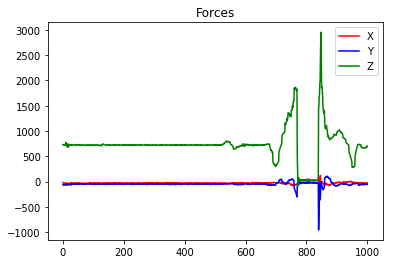

In [5]:
df1 = df.copy()
df1 = pd.DataFrame(df1.loc[1750:2750,:], columns = headings) # by looking at the graph above, there is pleanty of data that I can trim off
N = df1.shape[0] # length of the new data frame just incase
time = np.arange(0, N, 1) # time array of the new data frame
df1.index = time # starts the index at zero 

plt.plot( df1['Fx'], 'r', label = 'X')
plt.plot( df1['Fy'], 'b', label = 'Y')
plt.plot( df1['Fz'], 'g', label = 'Z')
plt.legend()
plt.title('Forces')
plt.show()

## "Normalization"

Would need a baseline measurement of the subject standing on the plate. Take the average force of a section from that event. Then subtract that number from every data point. 

In [6]:
M = df1.loc[0:250,'Fz'].mean()

dfNorm = df1.copy()
dfNorm = pd.DataFrame(dfNorm, index = time, columns = headings)

for i in range(N):
    dfNorm['Fz'][i] = dfNorm['Fz'][i] - M
    i = i + 1
    

## Graph again

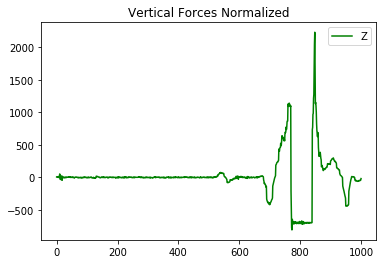

In [7]:
plt.figure()

#plt.subplot(1,2,1)
# plt.plot(dfNorm['Fx'], 'r', label = 'X')
# plt.plot(dfNorm['Fy'], 'b', label = 'Y')
plt.plot(dfNorm['Fz'], 'g', label = 'Z')
plt.legend()
plt.title('Vertical Forces Normalized')

plt.legend()
plt.show()

## Numerical integration to calculate the velocity and impulse/momentum

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


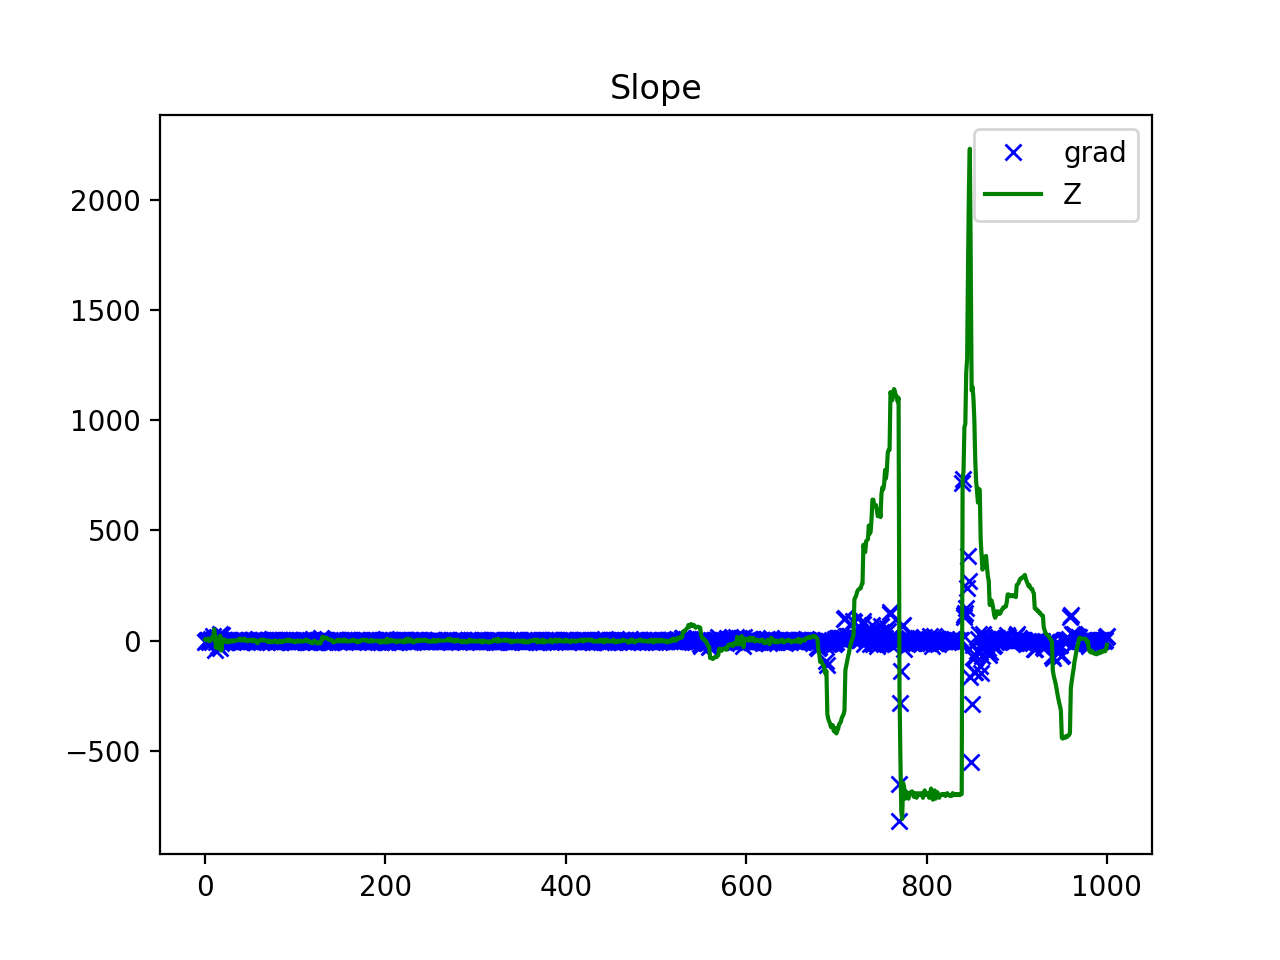

227.936030672311 kg m /s


In [9]:
# Impulse = F*delta t

freq = 100
N = dfNorm.shape[0]
dp = np.zeros(N-1)
dt = 1/freq

slopes=np.gradient(dfNorm['Fz'])

        
plt.figure()
#plt.plot(indices,slopes, 'bx', label = 'slope')
plt.plot(np.gradient(dfNorm['Fz']), 'bx', label = 'grad')
plt.plot(dfNorm['Fz'], 'g', label = 'Z')
plt.legend()
plt.title('Slope')
plt.legend()
plt.show()

#find where jump starts by negative slope
gradval1=-50 #negative gradient value that indicates the start of a jump
index1=np.where(slopes<gradval1)[0][0] #first index with gradient less than gradval1

#find previous zero for the beginning of the jump
gradzero_threshold=0.8 #zero is within this threshold
vals=dfNorm['Fz'][:index1]
index0=np.max(np.where(abs(vals) < gradzero_threshold)[0]) #index of zero slope before the jump

#find steep negative slope for end of jump
gradval2=-250
index2=np.where(slopes<gradval2)[0][0] #first index with gradient less than gradval1

J=0
#find impulse
for i in range(N-1):
    dp[i] = ((dfNorm['Fz'][i+1]+dfNorm['Fz'][i])/2)*dt
    if i > index0-1 and i < index2+1:
        J = J + dp[i]
    
print(J, 'kg m /s')

In [12]:
g = 9.8
m = M/g
#delta velocity
v = J/m

#average velocity
a = v/((index2-index0)*dt)
    
print(v, 'm/s')
print(a, 'm/ss')

3.0838888966652407 m/s
2.965277785255039 m/ss


<IPython.core.display.Javascript object>


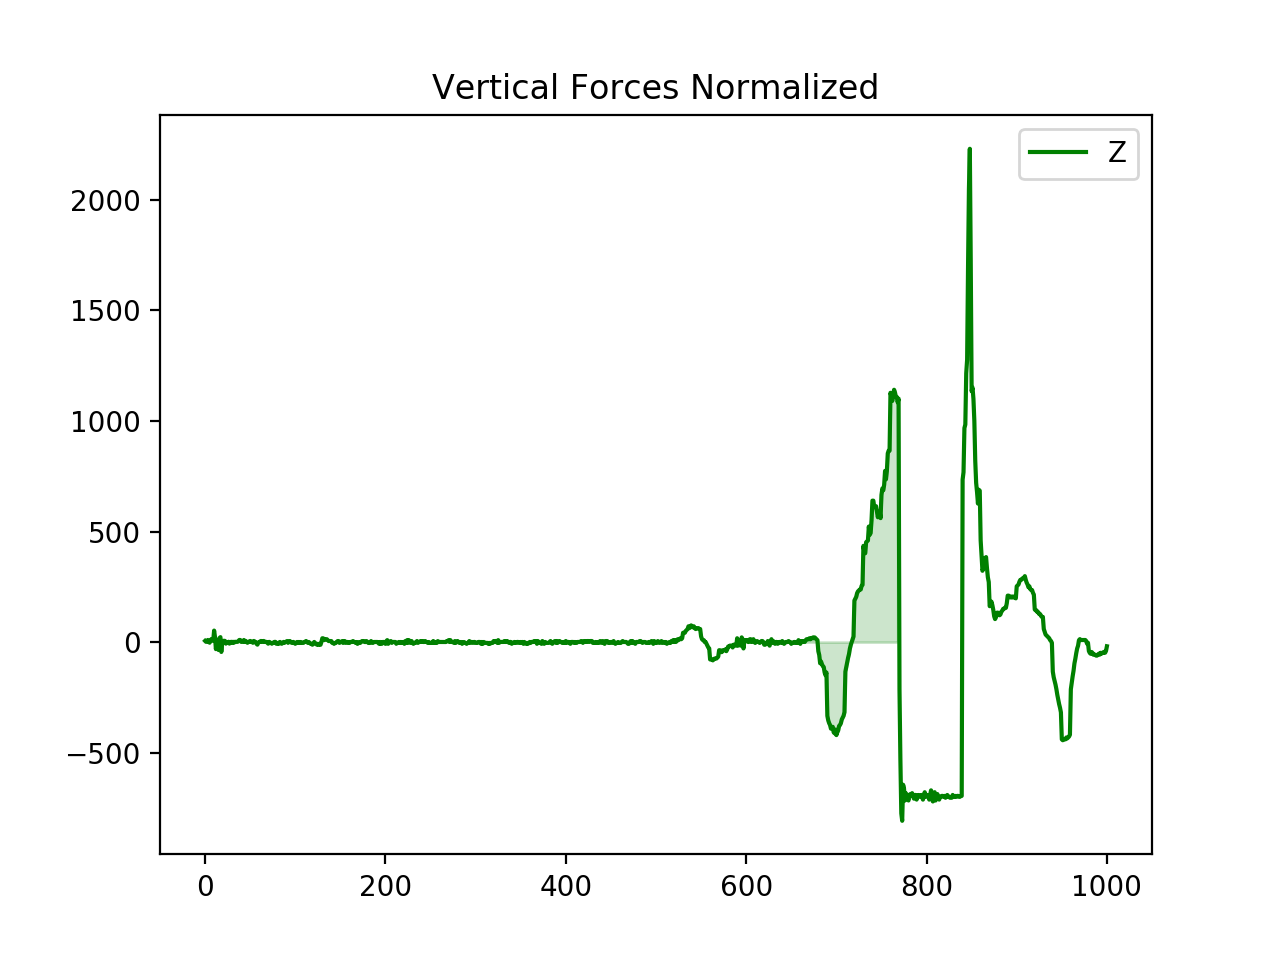

In [16]:
## Graph area under curve
plt.figure()
plt.plot(dfNorm['Fz'], 'g', label = 'Z')
plt.fill_between(range(index0,index2), dfNorm['Fz'][index0:index2], color='green', alpha = 0.2)
plt.legend()
plt.title('Vertical Forces Normalized')

plt.legend()
plt.show()